In [1]:
pip install -U scikit-fuzzy

     |████████████████████████████████| 1.0MB 2.5MB/s 
  Created wheel for scikit-fuzzy: filename=scikit_fuzzy-0.4.2-cp36-none-any.whl size=894069 sha256=35ac34a8aad9ab3d07bc72efe21d4476b912cd56a578366eafae33edd8f1bc6f
  Stored in directory: /root/.cache/pip/wheels/b9/4e/77/da79b16f64ef1738d95486e2731eea09d73e90a72465096600
Successfully built scikit-fuzzy


In [0]:
import numpy as np
import skfuzzy as fuzz
import matplotlib.pyplot as plt
import pandas as pd

In [4]:
#Upload csv file - wine dataset
from google.colab import files
uploaded = files.upload()

Saving winequalityN.csv to winequalityN.csv


In [5]:
# Experimenting with dataset
import io
data = pd.read_csv(io.StringIO(uploaded["winequalityN.csv"].decode('utf-8')))
# remove if empty columns
data = data.dropna()
data.isnull().values.any()

#divide into groups
wines = data.shape[0]
above_8 = data.loc[(data['quality'] >= 7)]
high_q_wines = above_8.shape[0]

mid = data.loc[(data['quality'] >= 5) &  (data['quality'] < 8)]
medium_q_wines = mid.shape[0]

under_3 = data.loc[(data['quality'] <= 4)]
low_q_wines = under_3.shape[0]

print("Total number of wine data: {}".format(wines))
print("High quality: {}".format(high_q_wines))
print("Medium quality: {}".format(medium_q_wines))
print("Low quality: {}".format(low_q_wines))

display(np.round(data.describe()))

Total number of wine data: 6463
High quality: 1271
Medium quality: 6022
Low quality: 244


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,6463.0,6463.0,6463.0,6463.0,6463.0,6463.0,6463.0,6463.0,6463.0,6463.0,6463.0,6463.0
mean,7.0,0.0,0.0,5.0,0.0,31.0,116.0,1.0,3.0,1.0,10.0,6.0
std,1.0,0.0,0.0,5.0,0.0,18.0,57.0,0.0,0.0,0.0,1.0,1.0
min,4.0,0.0,0.0,1.0,0.0,1.0,6.0,1.0,3.0,0.0,8.0,3.0
25%,6.0,0.0,0.0,2.0,0.0,17.0,77.0,1.0,3.0,0.0,10.0,5.0
50%,7.0,0.0,0.0,3.0,0.0,29.0,118.0,1.0,3.0,1.0,10.0,6.0
75%,8.0,0.0,0.0,8.0,0.0,41.0,156.0,1.0,3.0,1.0,11.0,6.0
max,16.0,2.0,2.0,66.0,1.0,289.0,440.0,1.0,4.0,2.0,15.0,9.0


                      fixed acidity  volatile acidity  ...   alcohol   quality
fixed acidity              1.000000          0.221066  ... -0.096190 -0.076174
volatile acidity           0.221066          1.000000  ... -0.039528 -0.266677
citric acid                0.323744         -0.377512  ... -0.010056  0.084926
residual sugar            -0.113442         -0.196677  ... -0.359132 -0.034654
chlorides                  0.299104          0.377995  ... -0.257664 -0.200553
free sulfur dioxide       -0.283485         -0.353402  ... -0.179477  0.054924
total sulfur dioxide      -0.330543         -0.414729  ... -0.264385 -0.041598
density                    0.459713          0.272101  ... -0.687432 -0.304447
pH                        -0.251121          0.260134  ...  0.120473  0.018403
sulphates                  0.301263          0.225656  ... -0.004116  0.039054
alcohol                   -0.096190         -0.039528  ...  1.000000  0.444637
quality                   -0.076174         -0.26667

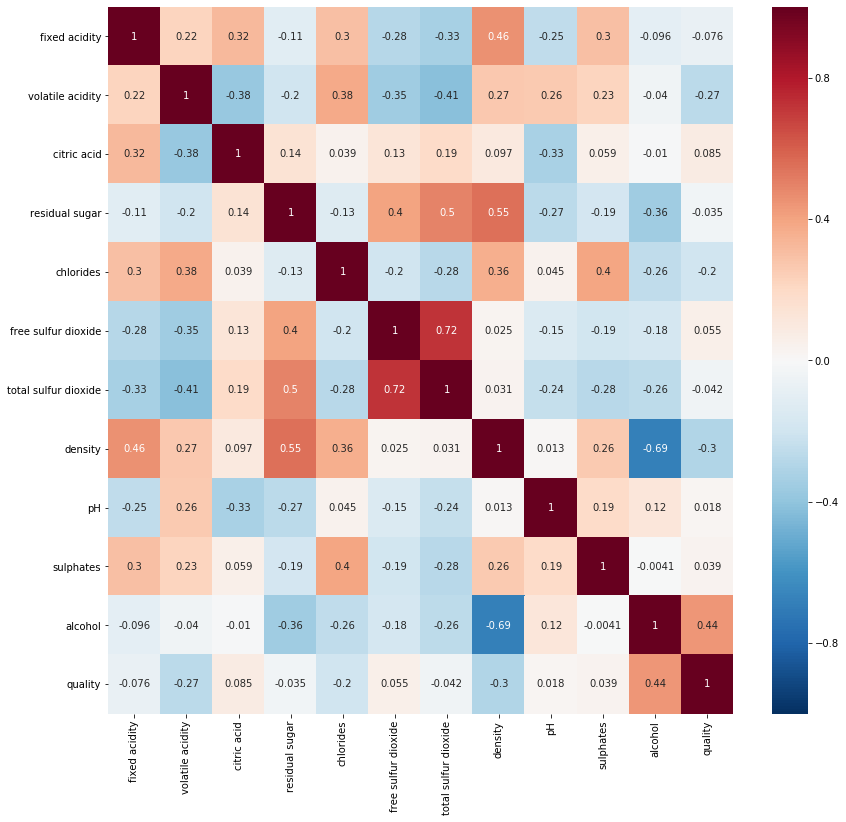

In [6]:
#Relations between features
import seaborn as sns
correlation = data.corr()
print(correlation)
plt.figure(figsize=(14, 13))
heatmap = sns.heatmap(correlation, annot=True, linewidths=0, vmin=-1, cmap="RdBu_r")

# The features that have highest
# relevant causal relation with the wine quality are:
# alcohol, fixed acidity, free sulfur dioxide, residual
# sugar and volatile acidity. Citric acid and sulphates
# are also variables that have causal relation with the
# wine quality but not with the same strength than the
# previous ones. It can also be concluded that the total
# sulfur dioxide is not a relevant variable to predict the
# wine quality, presumably because it has redundant
# information since the free sulfur dioxide is one of
# the selected causal variables. 

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:1672: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)


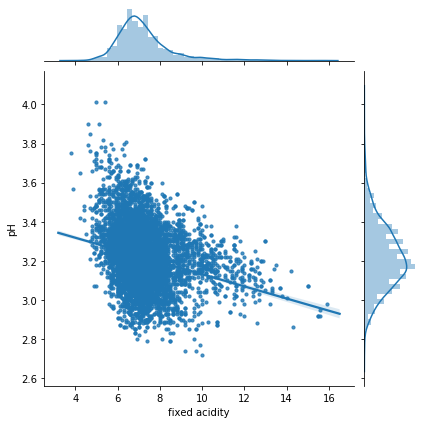

In [0]:
fixedAcidity_pH = data[['pH', 'fixed acidity']]

#Initialize a joint-grid with the dataframe, using seaborn library
gridA = sns.JointGrid(x="fixed acidity", y="pH", data=fixedAcidity_pH, size=6)

#Draws a regression plot in the grid 
gridA = gridA.plot_joint(sns.regplot, scatter_kws={"s": 10})

#Draws a distribution plot in the same grid
gridA = gridA.plot_marginals(sns.distplot)

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:1672: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)


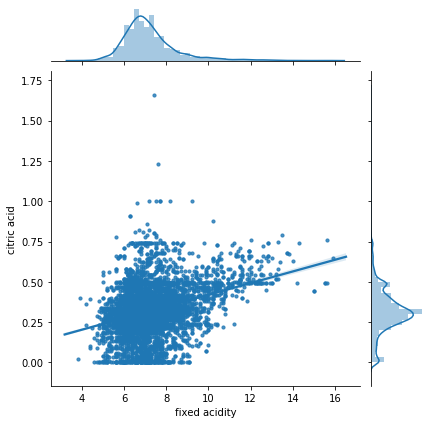

In [0]:
fixedAcidity_citricAcid = data[['citric acid', 'fixed acidity']]
g = sns.JointGrid(x="fixed acidity", y="citric acid", data=fixedAcidity_citricAcid, size=6)
g = g.plot_joint(sns.regplot, scatter_kws={"s": 10})
g = g.plot_marginals(sns.distplot)

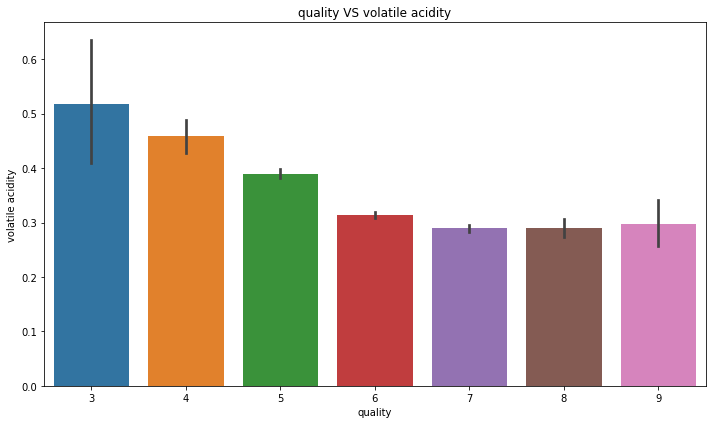

<Figure size 432x288 with 0 Axes>

In [0]:
fig, axs = plt.subplots(ncols=1,figsize=(10,6))
volatileAcidity_quality = data[['volatile acidity', 'quality']]
sns.barplot(x='quality', y='volatile acidity', data=volatileAcidity_quality, ax=axs)
plt.title('quality VS volatile acidity')

plt.tight_layout()
plt.show()
plt.gcf().clear()

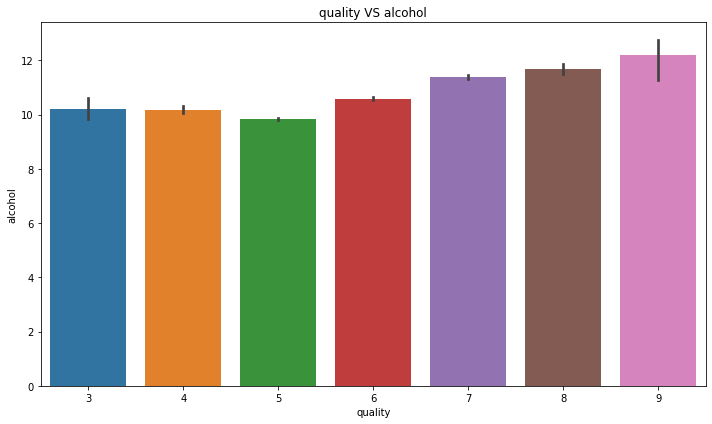

<Figure size 432x288 with 0 Axes>

In [0]:
fig, axs = plt.subplots(ncols=1,figsize=(10,6))
quality_alcohol = data[['quality', 'alcohol']]

sns.barplot(x='quality', y='alcohol', data=quality_alcohol, ax=axs)
plt.title('quality VS alcohol')

plt.tight_layout()
plt.show()
plt.gcf().clear()




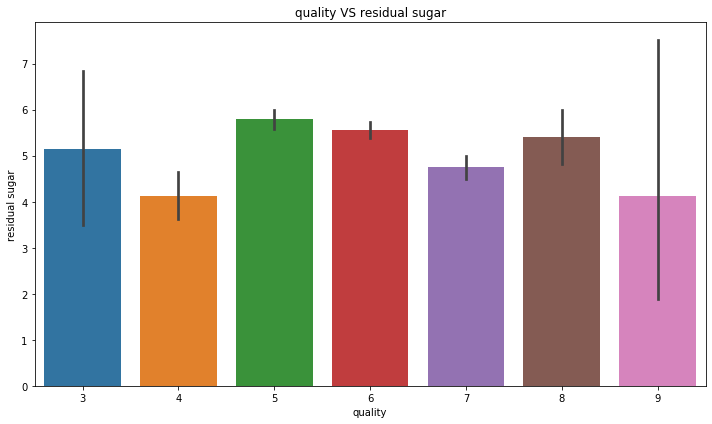

<Figure size 432x288 with 0 Axes>

In [0]:
fig, axs = plt.subplots(ncols=1,figsize=(10,6))
quality_fixed_acidity = data[['quality', 'residual sugar']]

sns.barplot(x='quality', y='residual sugar', data=quality_fixed_acidity, ax=axs)
plt.title('quality VS residual sugar')

plt.tight_layout()
plt.show()
plt.gcf().clear()

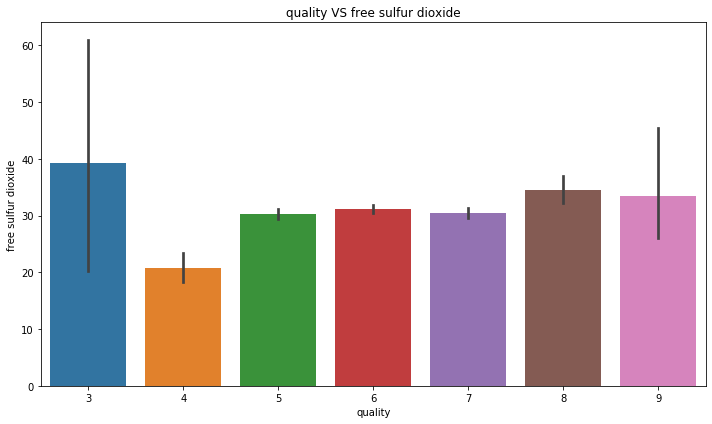

<Figure size 432x288 with 0 Axes>

In [0]:
fig, axs = plt.subplots(ncols=1,figsize=(10,6))
quality_fixed_acidity = data[['quality', 'free sulfur dioxide']]

sns.barplot(x='quality', y='free sulfur dioxide', data=quality_fixed_acidity, ax=axs)
plt.title('quality VS free sulfur dioxide')

plt.tight_layout()
plt.show()
plt.gcf().clear()

In [0]:
#ranges can be seen in the table with min max values

x_alcohol = np.arange(8, 16, 1)
x_fixed_acidity = np.arange(4, 17, 1)
x_volatile_acidity = np.arange(0, 3, 1)
x_free_sulfur =  np.arange(1, 290, 1)
x_quality = np.arange(3, 10, 1)
x_residual_sugar = np.arange(1, 67, 1)

# Generate fuzzy membership functions

#Alcohol
alcohol_low = fuzz.trimf(x_alcohol, [8, 8, 12])
alcohol_mid = fuzz.trimf(x_alcohol, [8, 12, 15])
alcohol_high = fuzz.trimf(x_alcohol, [12, 15, 15])

#Fixed acidity
fixed_ac_low = fuzz.trimf(x_fixed_acidity, [4, 4, 10])
fixed_ac_mid = fuzz.trimf(x_fixed_acidity, [4, 10, 16])
fixed_ac_high = fuzz.trimf(x_fixed_acidity, [10, 16, 16])

#Volatile acidity
volatile_low = fuzz.trimf(x_volatile_acidity, [0, 0, 1])
volatile_mid = fuzz.trimf(x_volatile_acidity, [0, 1, 2])
volatile_high = fuzz.trimf(x_volatile_acidity, [1, 2, 2])

#Free sulfur
sulfur_low = fuzz.trimf(x_free_sulfur, [1, 1, 144])
sulfur_mid = fuzz.trimf(x_free_sulfur, [1, 144, 289])
sulfur_high = fuzz.trimf(x_free_sulfur, [144, 289, 289])

#Residual sugar
residual_low = fuzz.trimf(x_residual_sugar, [1, 1, 33])
residual_mid = fuzz.trimf(x_residual_sugar, [33, 33, 66])
residual_high = fuzz.trimf(x_residual_sugar, [33, 66, 66])

#Quality
qual_low = fuzz.trimf(x_quality, [3, 3, 6])
qual_mid = fuzz.trimf(x_quality, [3, 6, 9])
qual_high = fuzz.trimf(x_quality, [6, 9, 9])


In [20]:
def fuzzy_inference(alcohol, fixed_acidity, volatile_acidity, sulfur):
  alcohol_level_low = fuzz.interp_membership(x_alcohol, alcohol_low, alcohol)
  alcohol_level_mid = fuzz.interp_membership(x_alcohol, alcohol_mid, alcohol)
  alcohol_level_high = fuzz.interp_membership(x_alcohol, alcohol_high, alcohol)

  fixed_ac_level_low = fuzz.interp_membership(x_fixed_acidity, fixed_ac_low, fixed_acidity)
  fixed_ac_level_mid = fuzz.interp_membership(x_fixed_acidity, fixed_ac_mid, fixed_acidity)
  fixed_ac_level_high = fuzz.interp_membership(x_fixed_acidity, fixed_ac_high, fixed_acidity)

  volatile_level_low = fuzz.interp_membership(x_volatile_acidity, volatile_low, volatile_acidity)
  volatile_level_mid = fuzz.interp_membership(x_volatile_acidity, volatile_mid, volatile_acidity)
  volatile_level_high = fuzz.interp_membership(x_volatile_acidity, volatile_high, volatile_acidity)

  sulfur_level_low = fuzz.interp_membership(x_free_sulfur, sulfur_low, sulfur)
  sulfur_level_mid = fuzz.interp_membership(x_free_sulfur, sulfur_mid, sulfur)
  sulfur_level_high = fuzz.interp_membership(x_free_sulfur, sulfur_high, sulfur)


# rules:
# If volatile acidity is high or free sulfur dioxide is high or fixed acidity  then quality will be low
# if free sulfur dioxide is medium or alcohol or fixed acidity is medium or residual sugar is high quality will be medium
# If alcohol is high or volatile acidity is low  or free sulfur dioxide is low then the quality will be high

# Rules simplified to 2 args -> RULES SHOULD BE MORE COMPLEX
  active_rule1 = np.fmax(volatile_level_high, alcohol_level_low)
  quality_low_prediction = np.fmin(active_rule1, qual_low) 
  x_low_q = np.max(quality_low_prediction)

  active_rule2 = np.fmax(alcohol_level_mid, fixed_ac_level_mid)
  quality_med_prediction = np.fmin(active_rule2, qual_mid)
  x_mid_q = np.max(quality_med_prediction)

  active_rule3 = np.fmax(alcohol_level_high, volatile_level_low)
  quality_high_prediction = np.fmin(active_rule3, qual_high)
  x_high_q = np.max(quality_high_prediction)

  levels = [x_low_q, x_mid_q, x_high_q]
  result =  np.argmax(levels)

# Aggregate all three output membership functions together
  aggregated = np.fmax(quality_low_prediction,
                     np.fmax(quality_med_prediction, quality_high_prediction))

# Calculate defuzzified result
  q = fuzz.defuzz(x_quality, aggregated, 'centroid')

  # if result == 0: 
  #     return 'Low Q'
  # elif result == 1 : 
  #     return 'Mid Q'
  # elif result == 2: 
  #     return 'High Q'
  # else: 
  #     return None
  return q.round()

fuzzy_inference(10.5, 6.8, 0.26, 41.0) 
# the values are from an example with high quality - 8 -> expected result high

6.0

In [22]:
data["fuzzy_q"] = data[['alcohol', 'fixed acidity', 'volatile acidity', 'free sulfur dioxide']].apply(lambda x: fuzzy_inference(*x), axis=1)
data.head(5)
accur_fuzzy = len(data[data["quality"] == data["fuzzy_q"]]) / len(data)
accur_fuzzy

0.43849605446387124

In [0]:
import operator
from sklearn.metrics import accuracy_score
from sklearn.base import BaseEstimator, ClassifierMixin

class FuzzyKNN(BaseEstimator, ClassifierMixin):
	def __init__(self, k=3, plot=False):
		self.k = k
		self.plot = plot


	def fit(self, X, y=None):
		self._check_params(X,y)
		self.X = X
		self.y = y

		self.xdim = len(self.X[0])
		self.n = len(y)

		classes = list(set(y))
		classes.sort()
		self.classes = classes

		self.df = pd.DataFrame(self.X)
		self.df['y'] = self.y

		self.memberships = self._compute_memberships()

		self.df['membership'] = self.memberships

		self.fitted_ = True
		return self


	def predict(self, X):
		if self.fitted_ == None:
			raise Exception('predict() called before fit()')
		else:
			m = 2
			y_pred = []

			for x in X:
				neighbors = self._find_k_nearest_neighbors(pd.DataFrame.copy(self.df), x)

				votes = {}
				for c in self.classes:
					den = 0
					for n in range(self.k):
						dist = np.linalg.norm(x - neighbors.iloc[n,0:self.xdim])
						den += 1 / (dist ** (2 / (m-1)))

					neighbors_votes = []
					for n in range(self.k):
						dist = np.linalg.norm(x - neighbors.iloc[n,0:self.xdim])
						num = (neighbors.iloc[n].membership[c]) / (dist ** (2 / (m-1)))

						vote = num/den
						neighbors_votes.append(vote)
					votes[c] = np.sum(neighbors_votes)

				pred = max(votes.items(), key=operator.itemgetter(1))[0]
				y_pred.append((pred, votes))

			return y_pred


	def score(self, X, y):
		if self.fitted_ == None:
			raise Exception('score() called before fit()')
		else:
			predictions = self.predict(X)
			y_pred = [t[0] for t in predictions]
			confidences = [t[1] for t in predictions]

			return accuracy_score(y_pred=y_pred, y_true=y)


	def _find_k_nearest_neighbors(self, df, x):
		X = df.iloc[:,0:self.xdim].values

		df['distances'] = [np.linalg.norm(X[i] - x) for i in range(self.n)]

		df.sort_values(by='distances', ascending=True, inplace=True)
		neighbors = df.iloc[0:self.k]

		return neighbors


	def _get_counts(self, neighbors):
		groups = neighbors.groupby('y')
		counts = {group[1]['y'].iloc[0]:group[1].count()[0] for group in groups}

		return counts


	def _compute_memberships(self):
		memberships = []
		for i in range(self.n):
			x = self.X[i]
			y = self.y[i]

			neighbors = self._find_k_nearest_neighbors(pd.DataFrame.copy(self.df), x)
			counts = self._get_counts(neighbors)

			membership = dict()
			for c in self.classes:
				try:
					uci = 0.49 * (counts[c] / self.k)
					if c == y:
						uci += 0.51
					membership[c] = uci
				except:
					membership[c] = 0

			memberships.append(membership)
		return memberships


	def _check_params(self, X, y):
		if type(self.k) != int:
			raise Exception('"k" should have type int')
		if self.k >= len(y):
			raise Exception('"k" should be less than no of feature sets')
		if self.k % 2 == 0:
			raise Exception('"k" should be odd')

		if type(self.plot) != bool:
			raise Exception('"plot" should have type bool')

In [105]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score

X = data[['alcohol', 'volatile acidity', 'fixed acidity']]
X = np.array(X)
y = data["quality"]
y = np.array(y)

xTrain, xTest, yTrain, yTest = train_test_split(X,y)
fuzzyModel = FuzzyKNN()

fuzzyModel.fit(xTrain, yTrain)

print(cross_val_score(cv=5, estimator=fuzzyModel, X=xTest, y=yTest))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:49: RuntimeWarning: divide by zero encountered in double_scalars
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:54: RuntimeWarning: invalid value encountered in double_scalars
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:54: RuntimeWarning: divide by zero encountered in double_scalars
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:56: RuntimeWarning: invalid value encountered in double_scalars


[0.37654321 0.37151703 0.39318885 0.39318885 0.39318885]


In [108]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score

X = data[['alcohol', 'volatile acidity', 'fixed acidity', 'free sulfur dioxide', 'residual sugar']]
X = np.array(X)
y = data["quality"]
y = np.array(y)

xTrain, xTest, yTrain, yTest = train_test_split(X,y)
fuzzyModel = FuzzyKNN()

fuzzyModel.fit(xTrain, yTrain)

print(cross_val_score(cv=5, estimator=fuzzyModel, X=xTest, y=yTest))

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  % (min_groups, self.n_splits)), UserWarning)
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:49: RuntimeWarning: divide by zero encountered in double_scalars
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:54: RuntimeWarning: invalid value encountered in double_scalars
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:54: RuntimeWarning: divide by zero encountered in double_scalars
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:56: RuntimeWarning: invalid value encountered in double_scalars


[0.39814815 0.39009288 0.40557276 0.43034056 0.34365325]


In [13]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score

X = data[['alcohol', 'volatile acidity', 'fixed acidity', 'free sulfur dioxide', 'residual sugar', 'citric acid', 'chlorides', 'sulphates']]
X = np.array(X)
y = data["quality"]
y = np.array(y)

xTrain, xTest, yTrain, yTest = train_test_split(X,y)
fuzzyModel = FuzzyKNN()

fuzzyModel.fit(xTrain, yTrain)

print(cross_val_score(cv=5, estimator=fuzzyModel, X=xTest, y=yTest))

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  % (min_groups, self.n_splits)), UserWarning)
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:49: RuntimeWarning: divide by zero encountered in double_scalars
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:54: RuntimeWarning: invalid value encountered in double_scalars
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:54: RuntimeWarning: divide by zero encountered in double_scalars
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:56: RuntimeWarning: invalid value encountered in double_scalars


[0.40123457 0.39628483 0.3869969  0.43034056 0.42105263]


In [14]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score

X = data[['alcohol', 'volatile acidity', 'fixed acidity', 'free sulfur dioxide', 'residual sugar', 'citric acid', 'chlorides', 'sulphates', 'total sulfur dioxide', 'density', 'pH']]
X = np.array(X)
y = data["quality"]
y = np.array(y)

xTrain, xTest, yTrain, yTest = train_test_split(X,y)
fuzzyModel = FuzzyKNN()

fuzzyModel.fit(xTrain, yTrain)

print(cross_val_score(cv=5, estimator=fuzzyModel, X=xTest, y=yTest))

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  % (min_groups, self.n_splits)), UserWarning)
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:49: RuntimeWarning: divide by zero encountered in double_scalars
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:54: RuntimeWarning: invalid value encountered in double_scalars
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:54: RuntimeWarning: divide by zero encountered in double_scalars
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:56: RuntimeWarning: invalid value encountered in double_scalars


[0.37037037 0.33436533 0.34055728 0.3498452  0.39628483]


In [107]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.base import BaseEstimator, ClassifierMixin

crispModel = KNeighborsClassifier()

crispModel.fit(xTrain, yTrain)

print(cross_val_score(cv=5, estimator=crispModel, X=xTest, y=yTest))


[0.44444444 0.45820433 0.47058824 0.45820433 0.48916409]


In [0]:
def crispClassifier(quality): 
    if quality >= 8:
        return 'High'
    elif quality >= 5:
        return 'Medium'
    elif quality <= 4:
        return 'Low'
    else: 
        return None

In [0]:
from skfuzzy import control as ctrl

alcohol = ctrl.Antecedent(np.arange(8, 16, 1), 'alcohol')
fixed_acidity = ctrl.Antecedent(np.arange(4, 17, 1), 'fixed_acidity')
volatile_acidity = ctrl.Antecedent(np.arange(0, 3, 1), 'volatile_acidity')
free_sulfur =  ctrl.Antecedent(np.arange(1, 290, 1), 'free_sulfur')
residual_sugar = ctrl.Antecedent(np.arange(1, 67, 1), 'residual_sugar')
quality = ctrl.Consequent(np.arange(3, 10, 1), 'quality')

#Alcohol
alcohol['low'] = fuzz.trimf(alcohol.universe, [8, 8, 12])
alcohol['medium'] = fuzz.trimf(alcohol.universe, [8, 12, 15])
alcohol['high'] = fuzz.trimf(alcohol.universe, [12, 15, 15])

#Fixed acidity
fixed_acidity['low'] = fuzz.trimf(fixed_acidity.universe, [4, 4, 10])
fixed_acidity['medium'] = fuzz.trimf(fixed_acidity.universe, [4, 10, 16])
fixed_acidity['high'] = fuzz.trimf(fixed_acidity.universe, [10, 16, 16])

#Volatile acidity
volatile_acidity['low'] = fuzz.trimf(volatile_acidity.universe, [0, 0, 1])
volatile_acidity['medium'] = fuzz.trimf(volatile_acidity.universe, [0, 1, 2])
volatile_acidity['high'] = fuzz.trimf(volatile_acidity.universe, [1, 2, 2])

#Free sulfur
free_sulfur['low'] = fuzz.trimf(free_sulfur.universe, [1, 1, 144])
free_sulfur['medium'] = fuzz.trimf(free_sulfur.universe, [1, 144, 289])
free_sulfur['high'] = fuzz.trimf(free_sulfur.universe, [144, 289, 289])

#Residual sugar
residual_sugar['low'] = fuzz.trimf(residual_sugar.universe, [1, 1, 33])
residual_sugar['medium'] = fuzz.trimf(residual_sugar.universe, [33, 33, 66])
residual_sugar['high'] = fuzz.trimf(residual_sugar.universe, [33, 66, 66])

#Quality
quality['low'] = fuzz.trimf(quality.universe, [3, 3, 6])
quality['medium'] = fuzz.trimf(quality.universe, [3, 6, 9])
quality['high'] = fuzz.trimf(quality.universe, [6, 9, 9])

rule1 = ctrl.Rule(alcohol['low'] | volatile_acidity['high'] & (fixed_acidity['high'] | free_sulfur['high']), quality['low'])
rule2 = ctrl.Rule(residual_sugar['medium'] | alcohol['medium'] | fixed_acidity['medium'] | free_sulfur['medium'], quality['medium'])
rule3 = ctrl.Rule(alcohol['high'] | volatile_acidity['low'] & (fixed_acidity['high'] | free_sulfur['high']), quality['high'])

quality_ctrl = ctrl.ControlSystem([rule1, rule2, rule3])
quality_result = ctrl.ControlSystemSimulation(quality_ctrl)

def classify(alcohol, fixed_acidity, volatile_acidity, free_sulfur, residual_sugar):
  quality_result.input['alcohol'] = alcohol
  quality_result.input['fixed_acidity'] = fixed_acidity
  quality_result.input['volatile_acidity'] = volatile_acidity
  quality_result.input['free_sulfur'] = free_sulfur
  quality_result.input['residual_sugar'] = residual_sugar

# Crunch the numbers
  quality_result.compute()
  return round(quality_result.output['quality'])

# type	fixed acidity	volatile acidity	citric acid	residual sugar	chlorides	free sulfur dioxide	total sulfur dioxide	density	pH	sulphates	alcohol	quality	fuzzy_q
# white	7.0	           0.27	            0.36	        20.7	         0.045	       45.0	            170.0	              1.0010	3.00	0.45	   8.8	    6	    High Q  5.963
#	white	6.8	           0.26	            0.42	        1.70	         0.049	       41.0	            122.0	              0.9930	3.47	0.48	   10.5	    8     6.316789783938876

In [24]:
data["fuzzy_q"] = data[['alcohol', 'fixed acidity', 'volatile acidity', 'free sulfur dioxide', 'residual sugar']].apply(lambda x: classify(*x), axis=1)
accur_fuzzy = len(data[data["quality"] == data["fuzzy_q"]]) / len(data)
accur_fuzzy

0.4699056165867244